In [7]:
import warnings 
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import StackingClassifier

In [11]:
df =  pd.read_csv(r"K:/Spam Email Project/Spam-Email-Detection-main/Data Source/SPAM.csv")


In [12]:
data = df.drop(labels=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [13]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [14]:
data.dtypes

Category    object
Message     object
dtype: object

In [15]:
data.loc[data['Category'] == 'spam', 'Category',] = 0
data.loc[data['Category'] == 'ham', 'Category',] = 1

In [16]:
data['Category'].value_counts()

Category
1    4825
0     747
Name: count, dtype: int64

In [17]:
X = data['Message']

Y = data['Category']

In [18]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [19]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [21]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [24]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase = True)

In [25]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [26]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

# LOGISTIC REGRESSION

In [27]:
lr = LogisticRegression()
lr.fit(X_train_features, Y_train)


lr_train = lr.predict(X_train_features)
lr_test = lr.predict(X_test_features)

        
lr_train_acc = accuracy_score(Y_train, lr_train)
lr_test_acc = accuracy_score(Y_test, lr_test)


lr_precision = precision_score(Y_test, lr_test)
lr_recall = recall_score(Y_test, lr_test)
lr_f1 = f1_score(Y_test, lr_test)


print("Logistic Regression:\n")
print("Training Data Accuracy:", lr_train_acc)
print("Testing Data Accuracy :", lr_test_acc)

print("Precision             :", lr_precision)
print("Recall                :", lr_recall)
print("F1 Score              :", lr_f1)

Logistic Regression:

Training Data Accuracy: 0.9661207089970832
Testing Data Accuracy : 0.9623318385650225
Precision             : 0.959
Recall                : 0.9989583333333333
F1 Score              : 0.9785714285714285


# DECISION TREES

In [28]:
dtrees = DecisionTreeClassifier()
dtrees.fit(X_train_features, Y_train)


dt_train = dtrees.predict(X_train_features)
dt_test = dtrees.predict(X_test_features)


dt_train_acc = accuracy_score(Y_train, dt_train)
dt_test_acc = accuracy_score(Y_test, dt_test)


dt_precision = precision_score(Y_test, dt_test)
dt_recall = recall_score(Y_test, dt_test)
dt_f1 = f1_score(Y_test, dt_test)


print("Decision Tress:\n")
print("Training Data Accuracy:", dt_train_acc)
print("Testing Data Accuracy :", dt_test_acc)

print("Precision             :", dt_precision)
print("Recall                :", dt_recall)
print("F1 Score              :", dt_f1)

Decision Tress:

Training Data Accuracy: 1.0
Testing Data Accuracy : 0.9668161434977578
Precision             : 0.9733333333333334
Recall                : 0.9885416666666667
F1 Score              : 0.9808785529715762


# K NEAREST NEIGHBORS

In [29]:
knn = KNeighborsClassifier()
knn.fit(X_train_features, Y_train)


knn_train = knn.predict(X_train_features)
knn_test = knn.predict(X_test_features)


knn_train_acc = accuracy_score(Y_train, knn_train)
knn_test_acc = accuracy_score(Y_test, knn_test)


knn_precision = precision_score(Y_test, knn_test)
knn_recall = recall_score(Y_test, knn_test)
knn_f1 = f1_score(Y_test, knn_test)


print("K Nearest Neighbors:\n")
print("Training Data Accuracy:", knn_train_acc)
print("Testing Data Accuracy :", knn_test_acc)

print("Precision             :", knn_precision)
print("Recall                :", knn_recall)
print("F1 Score              :", knn_f1)

K Nearest Neighbors:

Training Data Accuracy: 0.9199012788871438
Testing Data Accuracy : 0.905829596412556
Precision             : 0.9014084507042254
Recall                : 1.0
F1 Score              : 0.9481481481481482


# RANDOM FOREST

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train_features, Y_train)


rf_train = rf.predict(X_train_features)
rf_test = rf.predict(X_test_features)


rf_train_acc = accuracy_score(Y_train, rf_train)
rf_test_acc = accuracy_score(Y_test, rf_test)


rf_precision = precision_score(Y_test, rf_test)
rf_recall = recall_score(Y_test, rf_test)
rf_f1 = f1_score(Y_test, rf_test)


print("Random Forest:\n")
print("Training Data Accuracy:", rf_train_acc)
print("Testing Data Accuracy :", rf_test_acc)   
           
print("Precision             :", rf_precision)
print("Recall                :", rf_recall)
print("F1 Score              :", rf_f1)

Random Forest:

Training Data Accuracy: 1.0
Testing Data Accuracy : 0.9802690582959641
Precision             : 0.9785714285714285
Recall                : 0.9989583333333333
F1 Score              : 0.988659793814433


# STACKING MODEL

In [31]:
estimators = [ ('lr', lr), ('dtree', dtrees), ('knn', knn), ('rf', rf) ]
stack = StackingClassifier(estimators, final_estimator = SVC(kernel='linear'))
stack.fit(X_train_features, Y_train)


stack_train = stack.predict(X_train_features)
stack_test = stack.predict(X_test_features)


stack_train_acc = accuracy_score(Y_train, stack_train)
stack_test_acc = accuracy_score(Y_test, stack_test)


stack_precision = precision_score(Y_test, stack_test)
stack_recall = recall_score(Y_test, stack_test)
stack_f1 = f1_score(Y_test, stack_test)


print("Stacking Classifier:\n")
print("Training Data Accuracy:", stack_train_acc)
print("Testing Data Accuracy :", stack_test_acc)   
           
print("Precision             :", stack_precision)
print("Recall                :", stack_recall)
print("F1 Score              :", stack_f1)

Stacking Classifier:

Training Data Accuracy: 0.9995512676688355
Testing Data Accuracy : 0.9865470852017937
Precision             : 0.9876160990712074
Recall                : 0.996875
F1 Score              : 0.9922239502332815


# Metrics Visualization

In [32]:
train_acc_list = {"LR":lr_train_acc,
                  "DT":dt_train_acc,
                  "KNN":knn_train_acc,
                  "RF":rf_train_acc,
                  "STACK":stack_train_acc}

test_acc_list = {"LR":lr_test_acc,
                  "DT":dt_test_acc,
                  "KNN":knn_test_acc,
                  "RF":rf_test_acc,
                  "STACK":stack_test_acc}

precision_list = {"LR":lr_precision,
                  "DT":dt_precision,
                  "KNN":knn_precision,
                  "RF":rf_precision,
                  "STACK":stack_precision}

recall_list = {"LR":lr_recall,
               "DT":dt_recall,
               "KNN":knn_recall,
               "RF":rf_recall,
               "STACK":stack_recall}

f1_list = {"LR":lr_f1,
               "DT":dt_f1,
               "KNN":knn_f1,
               "RF":rf_f1,
               "STACK":stack_f1}

In [33]:
a1 =  pd.DataFrame.from_dict(train_acc_list, orient = 'index', columns = ["Traning Accuracy"])
a2 =  pd.DataFrame.from_dict(test_acc_list, orient = 'index', columns = ["Testing Accuracy"])
a3 =  pd.DataFrame.from_dict(precision_list, orient = 'index', columns = ["Precision Score"])
a4 =  pd.DataFrame.from_dict(recall_list, orient = 'index', columns = ["Recall Score"])
a5 =  pd.DataFrame.from_dict(f1_list, orient = 'index', columns = ["F1 Score"])

org = pd.concat([a1, a2, a3, a4, a5], axis = 1)
org

,Traning Accuracy,Testing Accuracy,Precision Score,Recall Score,F1 Score
LR,0.966121,0.962332,0.959000,0.998958,0.978571
DT,1.000000,0.966816,0.973333,0.988542,0.980879
KNN,0.919901,0.905830,0.901408,1.000000,0.948148
RF,1.000000,0.980269,0.978571,0.998958,0.988660
STACK,0.999551,0.986547,0.987616,0.996875,0.992224


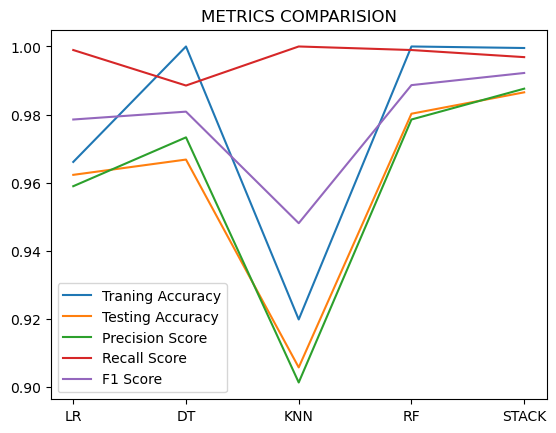

In [34]:
alg = ['LR','DT','KNN','RF','STACK']
plt.plot(alg,a1)
plt.plot(alg,a2)
plt.plot(alg,a3)
plt.plot(alg,a4)
plt.plot(alg,a5)
legend = ['Traning Accuracy', 'Testing Accuracy', 'Precision Score', 'Recall Score', 'F1 Score']
plt.title("METRICS COMPARISION")
plt.legend(legend)
plt.show()

In [35]:
input_mail = ["Hi this is  kalyan"]

input_mail_features = feature_extraction.transform(input_mail)

prediction = stack.predict(input_mail_features)

if(prediction == 0):
    print("SPAM MAIL")
else:
    print("HAM MAIL")

HAM MAIL
